In [1]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import measure, morphology
from mpl_toolkits.mplot3d import axes3d
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import cv2
import io
import PIL

In [2]:
def normlize(img):
    img = (img-np.min(img)) / (np.max(img) - np.min(img))
    return img

In [9]:
def plot_3d(image, threshold=0.7):
    
    # Position the scan upright, 
    # so the head of the patient would be at the top facing the camera
    p = image.transpose(2,1,0)
    
    verts, faces = measure.marching_cubes_classic(p, level=threshold)
    
    #print(verts, faces)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")
    

    # Fancy indexing: `verts[faces]` to generate a collection of triangles
    mesh = Poly3DCollection(verts[faces], alpha=0.70)
    
    #print("mesh shape is {}".format(mesh.shape))
    face_color = [0.45, 0.45, 0.75]
    mesh.set_facecolor(face_color)
    ax.add_collection3d(mesh)
    

    ax.set_xlim(0, p.shape[0])
    ax.set_ylim(0, p.shape[1])
    ax.set_zlim(0, p.shape[2])
    
    
    plt.show()

In [10]:
img = np.random.randn(80,4,7)

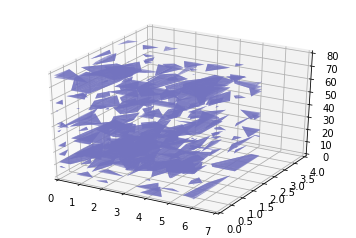

In [11]:
img = normlize(img)
plot_3d(img)